In [1]:

import queue
import matplotlib.pyplot as plt

# getting heuristics from fil
def getHeuristics():
    heuristics = {}
    f = open("Heuristics.txt")
    for i in f.readlines():
        node_heuristic_val = i.split()
        heuristics[node_heuristic_val[0]] = int(node_heuristic_val[1])

    return heuristics


# getting cities location from file
def getCity():
    city = {}
    citiesCode = {}
    f = open("cities.txt")
    j = 1
    for i in f.readlines():
        node_city_val = i.split()
        city[node_city_val[0]] = [int(node_city_val[1]), int(node_city_val[2])]

        citiesCode[j] = node_city_val[0]
        j += 1

    return city, citiesCode

In [2]:

# creating cities graph from file
def createGraph():
    graph = {}
    file = open("citiesGraph.txt")
    for i in file.readlines():
        node_val = i.split()

        if node_val[0] in graph and node_val[1] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})

            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

        elif node_val[0] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})

            graph[node_val[1]] = [[node_val[0], node_val[2]]]

        elif node_val[1] in graph:
            c = graph.get(node_val[1])                                                    
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

            graph[node_val[0]] = [[node_val[1], node_val[2]]]

        else:
            graph[node_val[0]] = [[node_val[1], node_val[2]]]
            graph[node_val[1]] = [[node_val[0], node_val[2]]]

    return graph


In [3]:
# Greedy Best First Search Algorithm
def GBFS(startNode, heuristics, graph, goalNode="Bucharest"):
     ### COMPLETE THE FUNCTION THAT SHOULD ONLY RETURN THE PATH 
    ### OF A-STAR SEARCH ALGORITHM
    ### DON'T ALTER THE PARAMETERS OF FUNCTIONS
    ### WRITE ONLY THE LOGIC OF A-STAR SEARCH
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], startNode))
    visited = set()
    parent = {}
    path = []

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]

        if current == goalNode:
            while current != startNode:
                path.append(current)
                current = parent[current]
            path.append(startNode)
            path.reverse()
            break

        visited.add(current)

        for neighbor, j in graph[current]:
            if neighbor not in visited:
                priorityQueue.put((heuristics[neighbor], neighbor))
                if neighbor not in parent:
                    parent[neighbor] = current

    return path


In [4]:
# Astar Algorithm
def Astar(startNode, heuristics, graph, goalNode="Bucharest"):
     ### COMPLETE THE FUNCTION THAT SHOULD ONLY RETURN THE PATH 
    ### OF A-STAR SEARCH ALGORITHM
    ### DON'T ALTER THE PARAMETERS OF FUNCTIONS
    ### WRITE ONLY THE LOGIC OF A-STAR SEARCH
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((0 + heuristics[startNode], 0, startNode))
    visited = set()
    gScore = {node: float('inf') for node in graph}
    gScore[startNode] = 0
    parent = {}
    path = []

    while priorityQueue.empty() == False:
        current = priorityQueue.get()
        currentCost, currentNode = current[0], current[2]

        if currentNode == goalNode:
            while currentNode != startNode:
                path.append(currentNode)
                currentNode = parent[currentNode]
            path.append(startNode)
            path.reverse()
            break

        visited.add(currentNode)

        for neighbor, cost in graph[currentNode]:
            tentative_gScore = gScore[currentNode] + int(cost)
            if tentative_gScore < gScore[neighbor]:
                parent[neighbor] = currentNode
                gScore[neighbor] = tentative_gScore
                fScore = tentative_gScore + heuristics[neighbor]
                if neighbor not in visited:
                    priorityQueue.put((fScore, tentative_gScore, neighbor))

    return path


In [5]:

# drawing map of answer
def drawMap(city, gbfs, astar, graph):
    for i, j in city.items():
        plt.plot(j[0], j[1], "ro")
        plt.annotate(i, (j[0] + 5, j[1]))

        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

    for i in range(len(gbfs)):
        try:
            first = city[gbfs[i]]
            secend = city[gbfs[i + 1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "green")
        except:
            continue

    for i in range(len(astar)):
        try:
            first = city[astar[i]]
            secend = city[astar[i + 1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "blue")
        except:
            continue

    plt.errorbar(1, 1, label="GBFS", color="green")
    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")

    plt.show()


1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind
GBFS =>  ['Hirsova', 'Urziceni', 'Bucharest']
ASTAR =>  ['Hirsova', 'Urziceni', 'Bucharest']


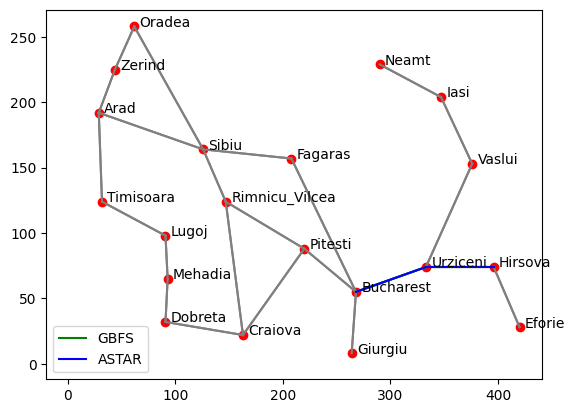

GBFS =>  ['Oradea', 'Sibiu', 'Fagaras', 'Bucharest']
ASTAR =>  ['Oradea', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest']


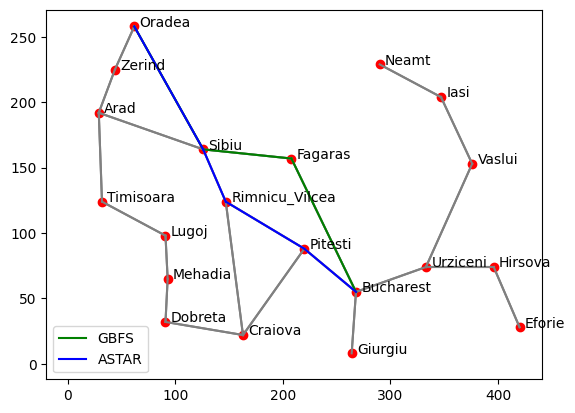

In [7]:


# running the program
def main():
    heuristic = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()

    for i, j in citiesCode.items():
        print(i, j)

    while True:
        inputCode = int(input("Please enter your desired start city's number (0 for exit): "))

        if inputCode == 0:
            break

        cityName = citiesCode[inputCode]

        gbfs = GBFS(cityName, heuristic, graph)
        astar = Astar(cityName, heuristic, graph)
        print("GBFS => ", gbfs)
        print("ASTAR => ", astar)

        drawMap(city, gbfs, astar, graph)


if __name__ == '__main__':
    main()
